In [ ]:
import os

from groq import Groq

: 

In [3]:
client = Groq(
    api_key=os.environ.get("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"),
)

GroqError: The api_key client option must be set either by passing api_key to the client or by setting the GROQ_API_KEY environment variable

In [4]:
export GROQ_API_KEY="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"


SyntaxError: invalid syntax (317971572.py, line 1)

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Explain the importance of fast language models",
        }
    ],
    model="llama3-8b-8192",
)

print(chat_completion.choices[0].message.content)

In [59]:
import json
import re
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
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

In [2]:
# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-german-cased")
model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-german-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\Users\Nursulu_1\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nursulu_1\.cache\huggingface\hub\models--google-bert--bert-base-german-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/485k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of the model checkpoint at google-bert/bert-base-german-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
# Function to generate BERT embeddings
def get_bert_embeddings(texts, tokenizer, model):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    embeddings = outputs['hidden_states'][-1].mean(dim=1)
    return embeddings


# Plotting using Matplotlib
def plot_clusters(plot_df, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(plot_df['x'], plot_df['y'], c=plot_df['Cluster'], cmap='viridis')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, label='Cluster')
    for i, doc in enumerate(plot_df['Document']):
        plt.annotate(doc, (plot_df['x'][i], plot_df['y'][i]))
    plt.show()

Prepare data

In [5]:
with open("afd_topics_collection/migration.json", 'rb') as file:
    data = json.load(file) 

In [8]:
# Function to remove the pattern from a single document
def remove_pattern(text, pattern):
    return re.sub(pattern, "", text)

In [9]:
# Regular expression pattern
pattern = r"Text \d+: "

# Remove the pattern from all documents
data_cleaned = [remove_pattern(doc, pattern) for doc in data]

In [21]:
data_cleaned = [el for el in data_cleaned if not el.isdigit() and len(el) > 1]

In [23]:
len(data_cleaned)

529

In [50]:
test_docs = data_cleaned[:20]
test_docs.append("Wir unterstützen die Migranten und bieten ihnen Asyl.")

In [51]:
# Generate embeddings for documents
embeddings = get_bert_embeddings(test_docs, tokenizer, model)

In [ ]:
np.savez('embeddings_bert_migration.npz')


In [52]:
documents = test_docs

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

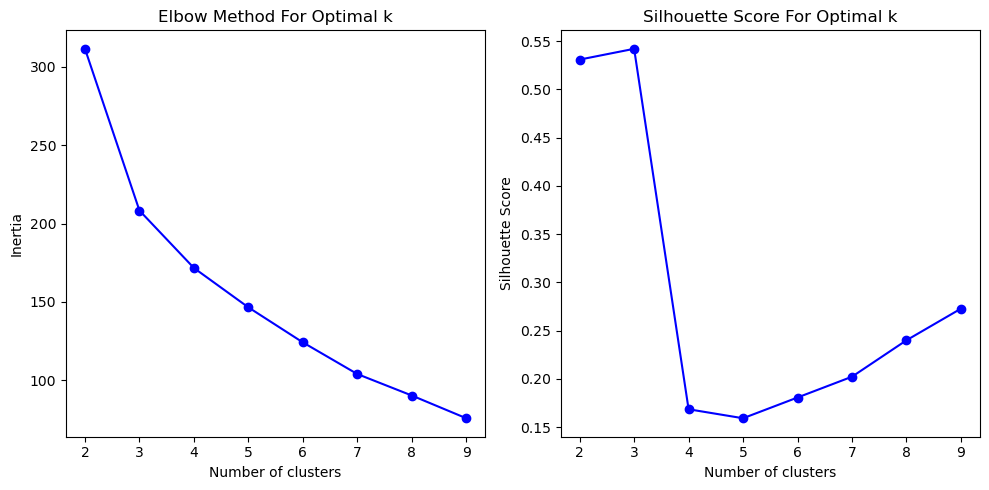

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: perplexity must be less than n_samples

In [53]:
# Elbow Method to determine optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(embeddings)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(embeddings, km.labels_))

# Plotting the Elbow Method results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_clusters = 2  # Assume this based on the elbow method and silhouette score

# Clustering using KMeans with optimal number of clusters
km = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = km.fit_predict(embeddings)

# Access cluster centers
cluster_centers = km.cluster_centers_

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)
reduced_cluster_centers_pca = pca.transform(cluster_centers)

# Dimensionality Reduction using t-SNE (with perplexity less than number of samples)
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)
reduced_cluster_centers_tsne = tsne.fit_transform(cluster_centers)

# Create a DataFrame for plotting
plot_df_pca = pd.DataFrame({
    'x': reduced_embeddings_pca[:, 0],
    'y': reduced_embeddings_pca[:, 1],
    'Cluster': clusters,
    'Document': documents
})

plot_df_tsne = pd.DataFrame({
    'x': reduced_embeddings_tsne[:, 0],
    'y': reduced_embeddings_tsne[:, 1],
    'Cluster': clusters,
    'Document': documents
})

# Function to plot clusters with centers
def plot_clusters_with_centers(plot_df, centers, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(plot_df['x'], plot_df['y'], c=plot_df['Cluster'], cmap='viridis', label='Documents')
    plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, label='Cluster')
    for i, doc in enumerate(plot_df['Document']):
        plt.annotate(doc, (plot_df['x'][i], plot_df['y'][i]))
    plt.legend()
    plt.show()

# Plot PCA clusters with centers
plot_clusters_with_centers(plot_df_pca, reduced_cluster_centers_pca, "PCA Clustering of Documents with Centers")

# Plot t-SNE clusters with centers
plot_clusters_with_centers(plot_df_tsne, reduced_cluster_centers_tsne, "t-SNE Clustering of Documents with Centers")

In [54]:
# Clustering using KMeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=42)
clusters = km.fit_predict(embeddings)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
cluster_centers = km.cluster_centers_


In [65]:
cluster_centers[0].shape

(768,)

In [74]:
new_text = "Wir unterstützen nicht die Einstellung von mehr qualifizierten Arbeitskräften."

In [75]:
text_embed = get_bert_embeddings(new_text, tokenizer, model)

In [76]:
text_embed = text_embed.squeeze()
text_embed = text_embed.numpy()

In [77]:
text_embed.shape

(768,)

In [78]:
embedding1 = text_embed.reshape(1, -1)  # Reshape to row vector for sklearn
for embedding2 in cluster_centers:
    embedding2 = embedding2.reshape(1, -1)
    similarity_sklearn = cosine_similarity(embedding1, embedding2)[0][0]
    print(similarity_sklearn)

0.8376356698335654
0.664693775283033
0.8108517368720571


In [ ]:
0.8228634902213635
0.6688061677412842
0.8268348500982019

In [57]:
# Create a DataFrame for inspection
docs_df = pd.DataFrame({
    'Document': documents,
    'Cluster': clusters
})

# Inspect the clusters
print(docs_df)

                                             Document  Cluster
0   Neue Eckpunkte des Einwanderungsgesetzes liege...        0
1   Die Verhöhnung der Bevölkerung durch SPD-Innen...        0
2   In Sachsen sind erste Kriegsflüchtlinge aus de...        0
3   Die Stadt Rostock hat wegen der Migrationskris...        0
4   Bis zum Ende des Jahres rechnet die rheinland-...        0
5   ++ #UN gibt bekannt: „Klima“ soll Asylgrund we...        0
6   Wieder einmal zeigt die CDU das wahre Gesicht ...        0
7   EU-Grenzen wirksam schützen!\n\nEs hat sich la...        0
8   Welches andere Land dieser Erde lässt sich der...        0
9   Welches andere Land dieser Erde lässt sich der...        0
10  Die heutige Landespressekonferenz mit Minister...        0
11  Lange Zeit galt Schweden als Musterland der ro...        0
12  Wieder einmal zeigt die CDU das wahre Gesicht ...        0
13  Wieder einmal zeigt die CDU das wahre Gesicht ...        0
14  Diese Landesregierung ist nicht in der Lage ri...  

In [49]:
docs_df['Document'][16]

'Impressionen vom #Wahlkampfauftakt in #Uelzen vom 28.08.2022. 💪🏼 #ltwniedersachsen #niedersachsen #afd'

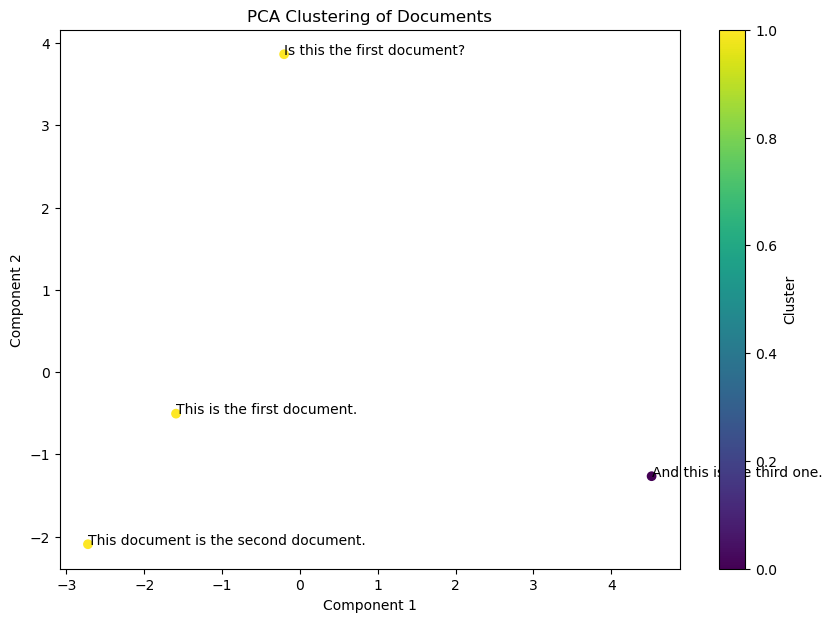

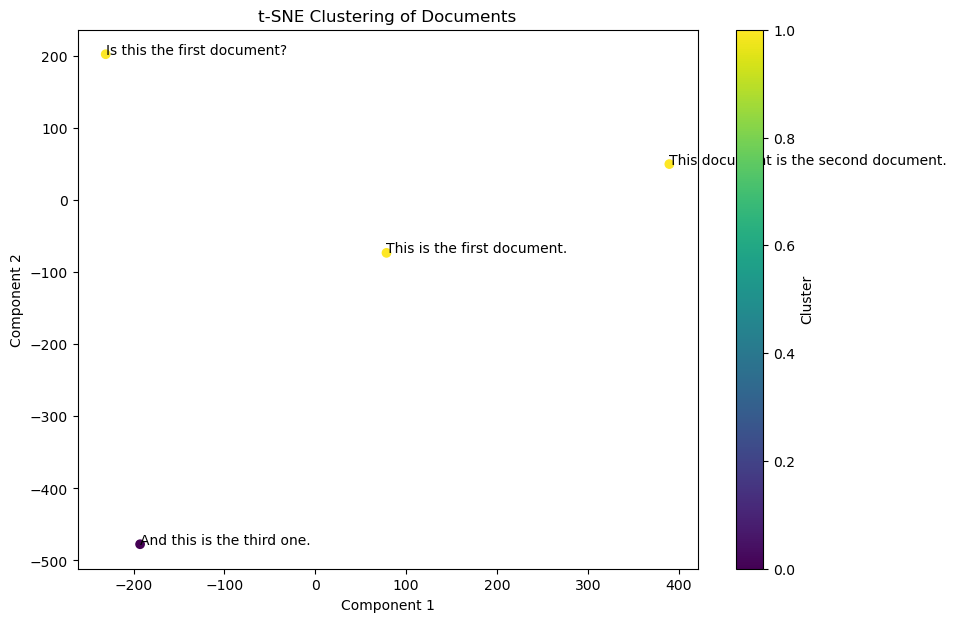

In [18]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# # Dimensionality Reduction using t-SNE (with perplexity less than number of samples)
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Create a DataFrame for plotting
plot_df_pca = pd.DataFrame({
    'x': reduced_embeddings_pca[:, 0],
    'y': reduced_embeddings_pca[:, 1],
    'Cluster': clusters,
    'Document': documents
})

plot_df_tsne = pd.DataFrame({
    'x': reduced_embeddings_tsne[:, 0],
    'y': reduced_embeddings_tsne[:, 1],
    'Cluster': clusters,
    'Document': documents
})

# Plot PCA clusters
plot_clusters(plot_df_pca, "PCA Clustering of Documents")

# Plot t-SNE clusters
plot_clusters(plot_df_tsne, "t-SNE Clustering of Documents")